# **TRAVAUX PRATIQUES (TP) : ANALYSE DES PROFILS AERODYNAMIQUES AVEC AEROSANDBOX**

## **1. Objectifs Pédagogiques**
À l’issue de ce TP, les étudiants seront capables de :

✅ Comprendre l’influence de la géométrie du profil sur la portance et la traînée.

✅ Visualiser la distribution des pressions autour d’un profil d’aile.

✅ Calculer la position du centre de poussée et représenter les forces aérodynamiques.

✅ Utiliser un outil de simulation (AeroSandbox) pour analyser les coefficients aérodynamiques.

✅ Prendre en main un notebook Jupyter pour l’analyse et la visualisation des résultats.

## **2. Prérequis**
📖 **Théoriques :**

Cours théorique aérodynamique IEAMAC/E

💻 **Techniques :**

- Notions de base en programmation (Python serait un plus, mais pas obligatoire)
- Aucun prérequis en Jupyter Notebook

## **I. INTRODUCTION**
### ✈️ **De la théorie à la pratique : Expérimenter l’aérodynamique autrement !**  

Vous connaissez déjà les principes aérodynamiques qui régissent le vol des avions : portance, traînée, écoulements d’air… Mais comment passe-t-on de la théorie à la conception d’une aile performante ?  

Traditionnellement, les ingénieurs utilisent des **souffleries** pour observer et mesurer les performances des profils aérodynamiques. Cependant, ces installations sont coûteuses et ne sont pas toujours accessibles. Heureusement, une autre approche, tout aussi puissante, existe : **la simulation numérique**.  

Grâce aux outils de modélisation et de calcul, il est possible de reproduire numériquement l’écoulement de l’air autour d’un profil d’aile, d’estimer les forces en jeu et d’optimiser les designs et au besoin de confirmer avec les expérimentations physiques. Cette démarche fait partie aujourd'hui, de toute une branche de l'aérodynamique et de la mécanique de fluide  appelée **CFD** (Computational fluid dynamic). La CFD et les essais en soufflerie sont complémentaires.

Certaines expérimentations impossibles en soufflerie sont de nos jours réalisables et replicables grace à la CFD.

Dans ce TP, nous allons explorer cette approche en utilisant des outils de simulation adaptés. À travers une série d’exercices guidés, vous apprendrez à :  

✅ Visualiser un profil d’aile et son écoulement d’air 🌪️  
✅ Simuler les forces de portance et de traînée en fonction des paramètres de vol ✈️  
✅ Analyser et interpréter les résultats pour améliorer la conception  

L’objectif ? Vous donner les bases nécessaires pour exploiter la simulation numérique dans vos futurs projets aéronautiques. **Préparez-vous à transformer votre compréhension de l’aérodynamique! 🚀**

## **II. PRISE EN MAIN DE L'OUTIL D'EXPERIMENTATION**
Pour réaliser nos simulations aérodynamiques, nous allons utiliser **Jupyter Notebook**, un environnement interactif qui permet d’exécuter du code Python tout en intégrant du texte, des formules et des visualisations. Cet outil est largement utilisé en science des données, en ingénierie et en recherche pour son côté intuitif et interactif.  

#### **Accéder à Jupyter Notebook**  
Il existe plusieurs façons d’utiliser Jupyter Notebook :  

✅ **Via Anaconda (installation locale)**  
- Anaconda est une distribution Python qui inclut directement Jupyter Notebook.  
- Pour l’installer :  
  1. Téléchargez Anaconda depuis [https://www.anaconda.com](https://www.anaconda.com).  
  2. Suivez les instructions d’installation.  
  3. Ouvrez **Anaconda Navigator** et lancez **Jupyter Notebook**.  

✅ **Via Google Colab (sans installation)**  
- **Google Colab** permet d’exécuter des notebooks Jupyter directement dans le navigateur, sans rien installer.  
- Il suffit d’aller sur [Google Colab](https://colab.research.google.com), de créer un nouveau notebook et de commencer à coder.  
- Avantage : accès à des ressources de calcul en ligne, pratique pour les simulations gourmandes.  

Dans la suite de ce TP, nous utiliserons Jupyter Notebook pour explorer les écoulements d’air autour d’un profil d’aile. **Si vous n’avez pas installé Anaconda, vous pouvez utiliser Google Colab pour suivre les exercices sans contrainte.** 🚀

### **II.1 Configuration**

Nous avons besoin d'installer les packages suivants :
- AeroSandbox : package complet de CFD qui contient les programmes nécessaires pour notre TP
  (by Peter Sharpe (pds@mit.edu))

# Installation de packages nécessaires :
Exécuter la commande suivante ***pip install AeroSandbox***

Après avoir installé les packages nécessaires, il faudrait les charger (importer) pour pouvoir les utiliser dans l'espace de travail. 

La commande **"import package as nom_au_choix"** est utilisée à cet effet

In [9]:
# Importation des packages nécessaires :
import aerosandbox as asb  # Outil numérique d'analyse aérodynamique
import aerosandbox.numpy as np # Outils pour srocker des tableaux et matrices
import matplotlib.pyplot as plt # Outil pour dessiner les graphiques

### **II.2 Définition et affichage d'un profil aérodynamique**

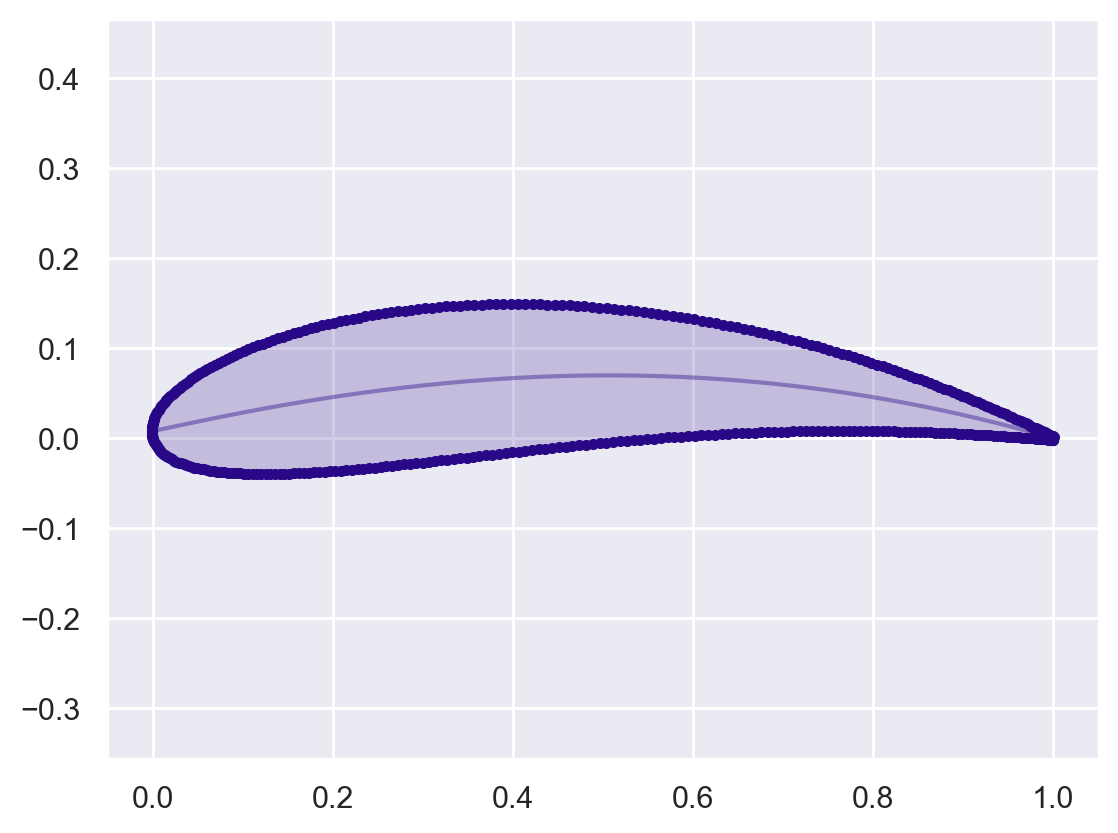

In [123]:
# définition du profil
Profil = asb.Airfoil("naca7017")
# affichage du profil
Profil.draw(draw_mcl=True, draw_markers=True, backend='matplotlib',show=False)

Lorsque nous avons la position du centre de poussée ($x_{cp}$) et les forces aérodynamiques ($ R_z, \\\\ et \\\\\ R_x$) on peut les représenter sur le profil.
Par exemple 
- $ x_{cp}=0.45  $ on utilisera   *plt.scatter(x=0.45,y=ycp,color="color1")*
  
- $ R_x=400N  $ on utilisera  *plt.quiver(xcp,ycp,Rx,0,color="color2",angles="xy",scale_units="xy",scale= "echelle",width="épaisseur")*
  
- $ R_z=1500N $ on utilisera  *plt.quiver(xcp,ycp,0,Rz,color="color3",angles="xy",scale_units="xy",scale="échelle",width="épaisseur")*

Le Ymax du graphique et 0.4 et le Rz est de 1500, il nous faut une d'environe 1/4000.

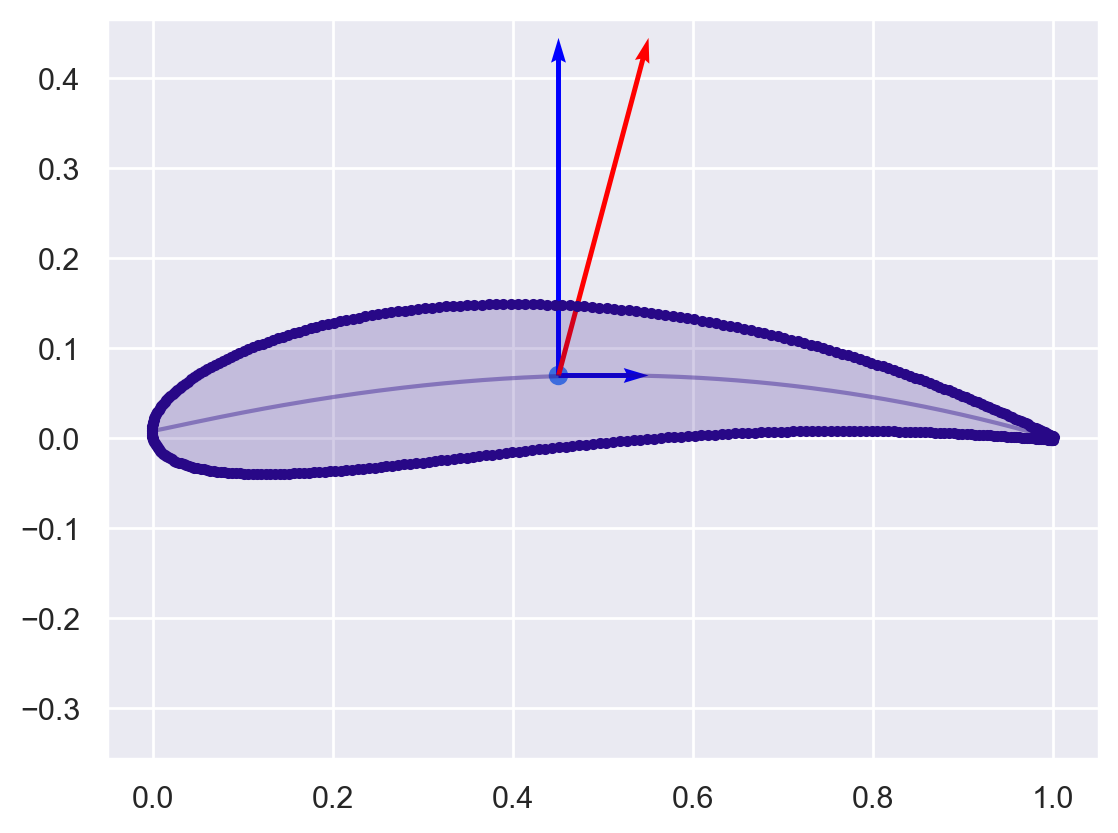

In [152]:
Profil.draw(draw_mcl=True, draw_markers=True, backend='matplotlib',show=False)
plt.scatter(x=0.45,y=0.07)  # y n'étant pas donné, le point légérement remontée dans le sens de y pour l'approcher de l'ossature
plt.quiver(0.45,0.07,400,0,color="b",angles="xy",scale_units="xy",scale=4000,width=0.005)
plt.quiver(0.45,0.07,0,1500,color="b",angles="xy",scale_units="xy",scale=4000,width=0.005)
plt.quiver(0.45,0.07,400,1500,color="r",angles="xy",scale_units="xy",scale=4000,width=0.005) 
plt.show()

## **II.3 Déterminer les caratéristiques aérodynamiques**

L'analyse des caractéritiques aérodynamiques tient compte de la configuration du profil. Dans le cas ci-dessous la configuration est donnée en fixant la vitesse et l'incidence et le nombre de Reynolds

In [16]:
# Calculer les cractéristiques aérodynamiques du profil
Analyse=Profil.get_aero_from_neuralfoil(alpha=15,Re=1e6,mach=0.4)

In [18]:
# Connaitre le Cz et Cx
Cz=Analyse["CL"]  # Cz=CL lift coefficient
Cx=Analyse["CD"]  # Cx=CD drag coefficient
print("Cz=",Cz)
print("Cx=",Cx)

Cz= [1.79163876]
Cx= [0.05961944]


Pour pouvoir tracer les polaires aérodynamiques, les cractéristiques du profil seront déterminés à plusieurs angles d'incidence. Pour ce faire nous allons générer une série d'incidence lineairment espacée de -5° à 15° en utilisant la fonction **np.linspace**

In [21]:
# Déterminer les coéfficient pour plusieurs incidences
incidence=np.linspace(-5,15,21) # Incidence de -5 à 15 uniformément espacé. 21 indique 21 incidence seront déterminées
incidence

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15.])

In [23]:
# Générer les coefficients pour chaque incidence
Analyse=Profil.get_aero_from_neuralfoil(alpha=incidence,Re=1e6,mach=0.4) # l'analyse
Cz=Analyse["CL"]
Cz

array([0.36015811, 0.48097059, 0.60101369, 0.71983511, 0.83815557,
       0.95582268, 1.07107312, 1.18190644, 1.2876282 , 1.38931774,
       1.48655171, 1.57379797, 1.64506983, 1.69894898, 1.73763141,
       1.76520951, 1.78580469, 1.80102129, 1.80943423, 1.80789075,
       1.79163876])

Nous avons ainsi une série d'incidence et une série de Cz, nous pouvons donc traçer la courbe

$C_z=f(\alpha)$

Pour ce faire la fonction $ plt.plot $ sera utilisée.

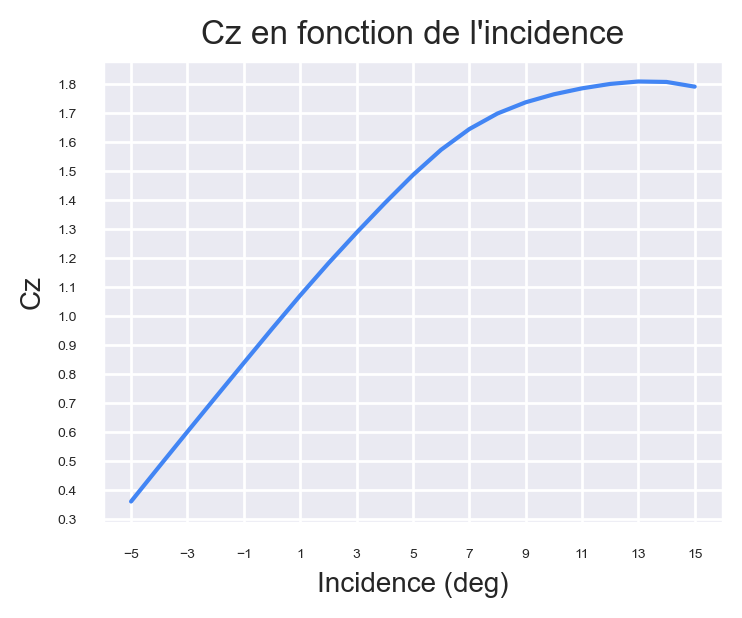

In [26]:
# Représentation graphie
  # Organisation de la zone de traçage 
Largeur=4
Hauteur=3
plt.figure(figsize=(Largeur,Hauteur)) # Dimension de la figure
plt.xlabel("Incidence (deg)",fontsize=10)  # Légende de l'axe des x
plt.ylabel("Cz",fontsize=10)  # Légende de l'axe des y
plt.xticks(np.arange(-5, 16, step=2),fontsize=5)
plt.yticks(np.arange(0, 2.1, step=0.1),fontsize=5)
plt.title("Cz en fonction de l'incidence")  # Titre du graphique
   # Traçage de la polaire
plt.plot(incidence,Cz)
plt.show()

## **II.4 Tracer les lignes du courant**
Les lignes courant autour d'un profil aérodynamique seront tracées ici. Le point de fonctionnement sera défini explicitement avec la fonction $ asb.OperatingPoint $ puis la fonction  $ asb.aerodynamics.AirfoilInviscid $ sera appelée pour déterminer toute les perturbation créées par le profil.

In [29]:
# Définir la configuration du vol
Config = asb.OperatingPoint(
    velocity=100,  # Vitesse infini amont en m/s
    alpha=20,  # Incidence en dégré
    beta=0,  # dérive en dégré
)
Perfo=asb.aerodynamics.AirfoilInviscid(airfoil=Profil,op_point=Config)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:   158804
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      399
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      399
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+02 0.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

Pour tracer les lignes du courant nous avons besoin de connaitre la vitesse de l'air dans maillage des points autour du profil

In [31]:
# Définir une grille des point où nous allons tracer les lignes
N = 50                                # Nombre des points dans chaque direction
x_start, x_end = -1, 2            # frontières x-direction
y_start, y_end = -1, 1            # frontières y-direction
x = np.linspace(x_start, x_end, N)    # créer un tableau  1D des x
y = np.linspace(y_start, y_end, N)    # créer un tableau 1D des y
# La grille avec mesh grid
X, Y = np.meshgrid(x, y)              # Générer une grille

In [32]:
# Calculer les vecteurs vitesse au niveau de chaque point de la grille
U, V = Perfo.calculate_velocity(x_field=X,y_field=Y)
#

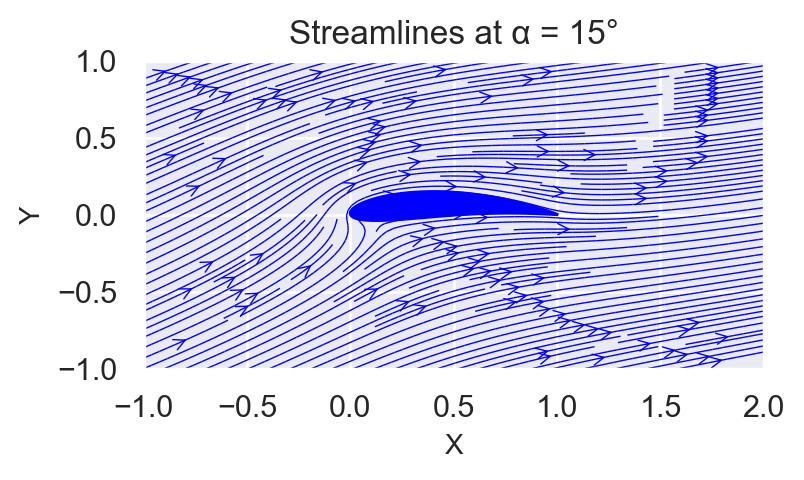

In [38]:
# Représentation graphique
  # Zone de traçage
Largeur=4
Hauteur=2
Alpha=15
plt.figure(figsize=(Largeur,Hauteur)) # Dimension de la figure
plt.xlabel("X",fontsize=10)  # Légende de l'axe des x
plt.ylabel("Y",fontsize=10)  # Légende de l'axe des y
plt.title(f"Streamlines at α = {Alpha}°")
   # Traçage
# Plot streamlines
plt.streamplot(X, Y, U, V, density=2, linewidth=0.5, arrowsize=1, arrowstyle='->', color='b') # Tracer les lignes
plt.fill(Profil.x(), Profil.y(), color='b')  # Tracer le profil
plt.show()

## **II.5 Tracer la distribution des pression kp**
Pour un écoulement permanent et incompressible, nous avons $ K_p=1-\frac{V^2}{V_{\infty}^2} $

In [41]:
Analyse=Profil.get_aero_from_neuralfoil(alpha=20,Re=1e6,mach=0.4) # l'analyse
Cz=Analyse["CL"][0]
Cx=Analyse["CD"][0]
Cx

0.21828628116506665

In [59]:
V=np.sqrt(U**2+V**2) # Le module de la vitesse sur chaque point de la grille
Kp=1-V**2/Config.velocity**2 # Kp avec V amont extraite de config

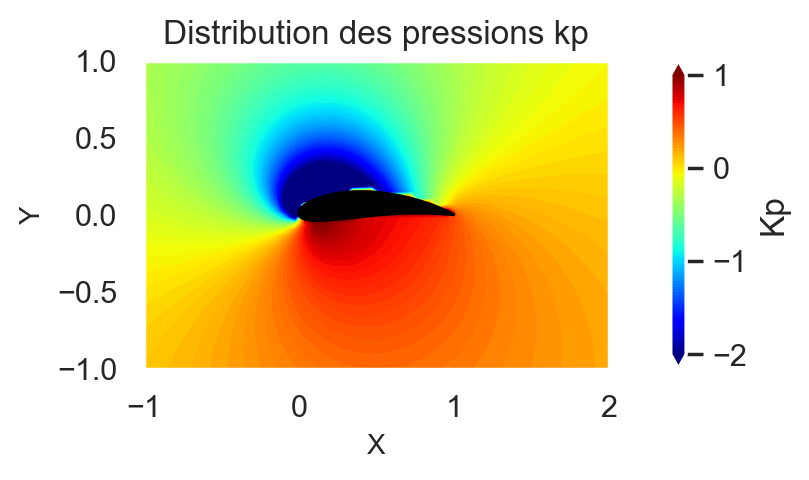

In [157]:
# Représentation graphique de Kp
Largeur=4
Hauteur=2
plt.figure(figsize=(Largeur,Hauteur)) # Dimension de la figure
plt.xlabel("X",fontsize=10)  # Légende de l'axe des x
plt.ylabel("Y",fontsize=10)  # Légende de l'axe des y
plt.title(f"Distribution des pressions kp")
# Plot streamlines
plt.contourf(X, Y, Kp, cmap='jet',levels=np.linspace(-2.0, 1.0, 100), extend='both') # Tracer
plt.fill(Profil.x(), Profil.y(), color='k')  # Tracer le profil
plt.colorbar(label="Kp", pad = 0.1,  ticks=[-2.0, -1.0, 0.0, 1.0])

## **II.4 Pratiquer**
Les étudiants sont repartis en groupe de 3 à 4 personnes pour traiter deux cas pratiques décrits aux pragraphes II.4.1 et II.4.2. Les résultat seront rendus sous-forme d'un rapport de Tp rédigé en word et transformer en pdf.

Pour les deux cas pratiques, on considérera le profil suivant :
- **Profondeur du profil :** 0.7m
- **Epaisseur maximale :** 4.9cm
- **Fleche maximale :** 2.8cm
- **Position de la Courbure maximale :** A 35 cm du bord d'attaque

Les conditions d'utilisation sont les suivantes
- **Vitesse d'utilisation :** 100Kt
- **Altitude d'utilisation :** 2000ft

### **Cas pratique 1**
1. Donner une représentation graphique du profil de cette aile
2. Tracer Cz=f(Alpha) et déterminer graphiquement l'incidence de décrochage du profil
3. Tracer la polaire Cz=f(Cx)
4. déterminer la finesse maximale et l'incidence correspondante

**Nb:** Pour déterminer la temperature à une altitude donnée Z en m, on peut utiliser asb.atmosphere.temperature_differentiable(Z)

### **Cas Pratique 2**
1. Tracer la distribution des pression autour du profil.
2. Déterminer le centre de poussée et tracer la resultante aérodynamique qui s'applique au profil.
   
**Hint :** Pour déterminer le **Cp** vous pourvez calculer la vitesse pour chaque point de l'intrados (V_int) et pour chaque point de l'extrados (V_ext) et utiliser l'équation de Bernoullie restreinte pour calculer les pressions. On considerea une surface alaire de $1m^2$


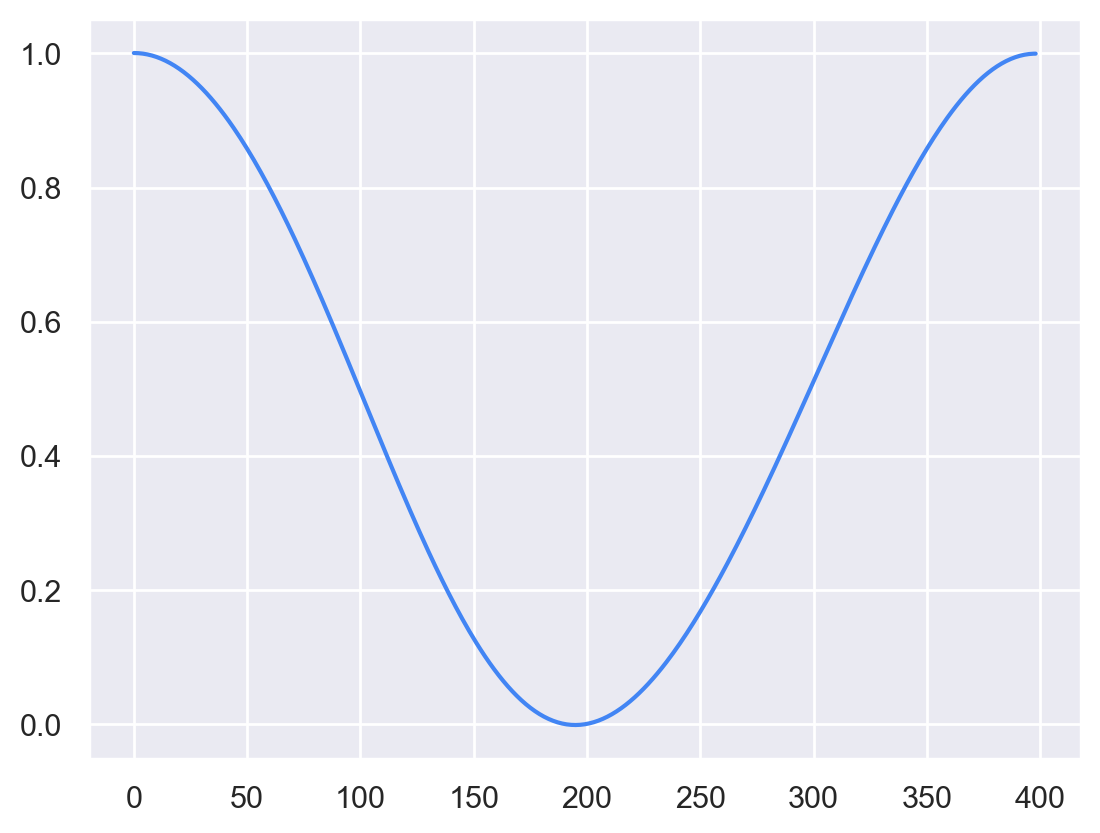

In [163]:
# Exemple de la distribution des x, Chaque valeur est doublée, une pour l'intrados et l'autre pour l'extrados
plt.plot(Profil.x())